# Goal: Data Clean

In [68]:
""" 
Goal: Clean the Data
Author: Rudra Prasad Bhuyan
"""

' \nGoal: Clean the Data\nAuthor: Rudra Prasad Bhuyan\n'

In [69]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-02\data\lev-02_merged.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('Person_Serial_No', String),
        ('Relation_to_Head', String),
        ('Gender', String),
        ('Age', String),
        ('Marital_Status', String),
        ('Education_Level', String),
        ('Years_of_Education', String),
        ('Used_Internet_Last_30_Days', String),
        ('Days_Away_From_Home_Last_30_Days', String),
        ('Meals_Usually_Taken_Per_Day', String),
        ('

In [71]:
mp_data = pdf.filter(
    pl.col('State') == '23'
)

mp_data['State'].unique()

shape: (1,)
Series: 'State' [str]
[
	"23"
]

# Break down all useful variables into separate group

In [72]:
lev_02_hh = [ 'Revisit_Status', 'FDQ_Original_Member', 'Multiplier']

lev_02_food = ['Meals_Usually_Taken_Per_Day','Meals_From_School',
               'Meals_From_Employer','Meals_Other',
               'Meals_On_Payment','Meals_At_Home']

lev_02_digital = ['Used_Internet_Last_30_Days']

lev_02__behavior = ['Days_Away_From_Home_Last_30_Days']

lev_02_user = ['FSU_Serial_No', 'Relation_to_Head','Gender',
               'Age', 'Marital_Status', 
               'Education_Level', 'Years_of_Education']

In [73]:
lev_02_cols = (
    lev_02_hh
    + lev_02_food
    + lev_02_digital
    + lev_02__behavior
    + lev_02_user
)

In [74]:
mp_data = mp_data[lev_02_cols]

In [75]:
mp_data

shape: (64_952, 18)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Revisit_St ‚îÜ FDQ_Origin ‚îÜ Multiplier ‚îÜ Meals_Usua ‚îÜ ‚Ä¶ ‚îÜ Age ‚îÜ Marital_St ‚îÜ Education ‚îÜ Years_of_ ‚îÇ
‚îÇ atus       ‚îÜ al_Member  ‚îÜ ---        ‚îÜ lly_Taken_ ‚îÜ   ‚îÜ --- ‚îÜ atus       ‚îÜ _Level    ‚îÜ Education ‚îÇ
‚îÇ ---        ‚îÜ ---        ‚îÜ i64        ‚îÜ Per_Day    ‚îÜ   ‚îÜ str ‚îÜ ---        ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ str        ‚îÜ str        ‚îÜ            ‚îÜ ---        ‚îÜ   ‚îÜ     ‚îÜ str        ‚îÜ str       ‚îÜ str       ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ str        ‚îÜ   ‚îÜ     ‚îÜ            ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1          ‚îÜ 1          ‚îÜ 131077     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 46  ‚îÜ 3          ‚îÜ 01        ‚îÜ           ‚îÇ
‚îÇ 1          ‚îÜ 1          ‚îÜ 131077     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 19  ‚îÜ 1          ‚îÜ 07        ‚îÜ 12        ‚îÇ
‚îÇ 1          ‚îÜ 1          ‚îÜ 131077     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 21  ‚îÜ 1          ‚îÜ 07        ‚îÜ 12        ‚îÇ
‚îÇ 1          ‚îÜ 1          ‚îÜ 131077     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 52  ‚îÜ 2          ‚îÜ 03        ‚îÜ 5         ‚îÇ
‚îÇ 1          ‚îÜ 1          ‚îÜ 131077     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 50  ‚îÜ 2          ‚îÜ 01        ‚îÜ           ‚îÇ
‚îÇ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 1          ‚îÜ 1          ‚îÜ 173023     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 42  ‚îÜ 2          ‚îÜ 05        ‚îÜ 8         ‚îÇ
‚îÇ 1          ‚îÜ 1          ‚îÜ 173023     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 40  ‚îÜ 2          ‚îÜ 05        ‚îÜ 8         ‚îÇ
‚îÇ 1          ‚îÜ 1          ‚îÜ 173023     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 11  ‚îÜ 1          ‚îÜ 04        ‚îÜ 5         ‚îÇ
‚îÇ 1          ‚îÜ 1          ‚îÜ 173023     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 14  ‚îÜ 1          ‚îÜ 05        ‚îÜ 8         ‚îÇ
‚îÇ 1          ‚îÜ 1          ‚îÜ 173023     ‚îÜ 2          ‚îÜ ‚Ä¶ ‚îÜ 9   ‚îÜ 1          ‚îÜ 03        ‚îÜ 3         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

## Casting

In [76]:
mp_data = mp_data.with_columns(
    [pl.col(col).cast(pl.Int32, strict=False) for col in lev_02_cols]
)

## House hold

In [77]:
mp_data[lev_02_hh]

shape: (64_952, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Revisit_Status ‚îÜ FDQ_Original_Member ‚îÜ Multiplier ‚îÇ
‚îÇ ---            ‚îÜ ---                 ‚îÜ ---        ‚îÇ
‚îÇ i32            ‚îÜ i32                 ‚îÜ i32        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1              ‚îÜ 1                   ‚îÜ 131077     ‚îÇ
‚îÇ 1              ‚îÜ 1                   ‚îÜ 131077     ‚îÇ
‚îÇ 1              ‚îÜ 1                   ‚îÜ 131077     ‚îÇ
‚îÇ 1              ‚îÜ 1                   ‚îÜ 131077     ‚îÇ
‚îÇ 1              ‚îÜ 1                   ‚îÜ 131077     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶                   ‚îÜ ‚Ä¶          ‚îÇ
‚îÇ 1              ‚îÜ 1                   ‚îÜ 173023     ‚îÇ
‚îÇ 1              ‚îÜ 1                   ‚îÜ 173023     ‚îÇ
‚îÇ 1              ‚îÜ 1                   ‚îÜ 173023     ‚îÇ
‚îÇ 1              ‚îÜ 1                   ‚îÜ 173023     ‚îÇ
‚îÇ 1              ‚îÜ 1                   ‚îÜ 173023     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [78]:
mp_data[lev_02_hh].describe()

shape: (9, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ Revisit_Status ‚îÜ FDQ_Original_Member ‚îÜ Multiplier    ‚îÇ
‚îÇ ---        ‚îÜ ---            ‚îÜ ---                 ‚îÜ ---           ‚îÇ
‚îÇ str        ‚îÜ f64            ‚îÜ f64                 ‚îÜ f64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 64952.0        ‚îÜ 64864.0             ‚îÜ 64952.0       ‚îÇ
‚îÇ null_count ‚îÜ 0.0            ‚îÜ 88.0                ‚îÜ 0.0           ‚îÇ
‚îÇ mean       ‚îÜ 1.003741       ‚îÜ 1.0                 ‚îÜ 112568.796927 ‚îÇ
‚îÇ std        ‚îÜ 0.080231       ‚îÜ 0.0                 ‚îÜ 68371.178028  ‚îÇ
‚îÇ min        ‚îÜ 1.0            ‚îÜ 1.0                 ‚îÜ 1913.0        ‚îÇ
‚îÇ 25%        ‚îÜ 1.0            ‚îÜ 1.0                 ‚îÜ 67000.0       ‚îÇ
‚îÇ 50%        ‚îÜ 1.0            ‚îÜ 1.0                 ‚îÜ 115615.0      ‚îÇ
‚îÇ 75%        ‚îÜ 1.0            ‚îÜ 1.0                 ‚îÜ 144808.0      ‚îÇ
‚îÇ max        ‚îÜ 3.0            ‚îÜ 1.0                 ‚îÜ 888474.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

- FDQ feature only have the null values
- If we see the unique value 
- We found only 1 so we replace with one 

In [79]:
mp_data['FDQ_Original_Member'].unique()

shape: (2,)
Series: 'FDQ_Original_Member' [i32]
[
	null
	1
]

In [80]:
mp_data = mp_data.with_columns(
    pl.col('FDQ_Original_Member').fill_null(strategy='one')
)

In [81]:
mp_data['FDQ_Original_Member'].unique()

shape: (1,)
Series: 'FDQ_Original_Member' [i32]
[
	1
]

## Food 

In [82]:
mp_data[lev_02_food]

shape: (64_952, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Meals_Usually_T ‚îÜ Meals_From_Sch ‚îÜ Meals_From_Emp ‚îÜ Meals_Other ‚îÜ Meals_On_Payme ‚îÜ Meals_At_Home ‚îÇ
‚îÇ aken_Per_Day    ‚îÜ ool            ‚îÜ loyer          ‚îÜ ---         ‚îÜ nt             ‚îÜ ---           ‚îÇ
‚îÇ ---             ‚îÜ ---            ‚îÜ ---            ‚îÜ i32         ‚îÜ ---            ‚îÜ i32           ‚îÇ
‚îÇ i32             ‚îÜ i32            ‚îÜ i32            ‚îÜ             ‚îÜ i32            ‚îÜ               ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 60            ‚îÇ
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 60            ‚îÇ
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 60            ‚îÇ
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 60            ‚îÇ
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 60            ‚îÇ
‚îÇ ‚Ä¶               ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶             ‚îÇ
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 60            ‚îÇ
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 57            ‚îÇ
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 60            ‚îÇ
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 60            ‚îÇ
‚îÇ 2               ‚îÜ null           ‚îÜ null           ‚îÜ null        ‚îÜ null           ‚îÜ 60            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [83]:
mp_data[lev_02_food].describe()

shape: (9, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ Meals_Usuall ‚îÜ Meals_From_S ‚îÜ Meals_From_ ‚îÜ Meals_Other ‚îÜ Meals_On_Pa ‚îÜ Meals_At_Ho ‚îÇ
‚îÇ ---        ‚îÜ y_Taken_Per_ ‚îÜ chool        ‚îÜ Employer    ‚îÜ ---         ‚îÜ yment       ‚îÜ me          ‚îÇ
‚îÇ str        ‚îÜ Day          ‚îÜ ---          ‚îÜ ---         ‚îÜ f64         ‚îÜ ---         ‚îÜ ---         ‚îÇ
‚îÇ            ‚îÜ ---          ‚îÜ f64          ‚îÜ f64         ‚îÜ             ‚îÜ f64         ‚îÜ f64         ‚îÇ
‚îÇ            ‚îÜ f64          ‚îÜ              ‚îÜ             ‚îÜ             ‚îÜ             ‚îÜ             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 64833.0      ‚îÜ 10670.0      ‚îÜ 7743.0      ‚îÜ 13515.0     ‚îÜ 9362.0      ‚îÜ 64690.0     ‚îÇ
‚îÇ null_count ‚îÜ 119.0        ‚îÜ 54282.0      ‚îÜ 57209.0     ‚îÜ 51437.0     ‚îÜ 55590.0     ‚îÜ 262.0       ‚îÇ
‚îÇ mean       ‚îÜ 2.304922     ‚îÜ 5.541706     ‚îÜ 0.164665    ‚îÜ 2.536293    ‚îÜ 1.228904    ‚îÜ 67.543098   ‚îÇ
‚îÇ std        ‚îÜ 0.522551     ‚îÜ 8.747545     ‚îÜ 2.737623    ‚îÜ 5.487476    ‚îÜ 6.034109    ‚îÜ 15.35473    ‚îÇ
‚îÇ min        ‚îÜ 0.0          ‚îÜ 0.0          ‚îÜ 0.0         ‚îÜ 0.0         ‚îÜ 0.0         ‚îÜ 0.0         ‚îÇ
‚îÇ 25%        ‚îÜ 2.0          ‚îÜ 0.0          ‚îÜ 0.0         ‚îÜ 0.0         ‚îÜ 0.0         ‚îÜ 60.0        ‚îÇ
‚îÇ 50%        ‚îÜ 2.0          ‚îÜ 0.0          ‚îÜ 0.0         ‚îÜ 1.0         ‚îÜ 0.0         ‚îÜ 60.0        ‚îÇ
‚îÇ 75%        ‚îÜ 3.0          ‚îÜ 15.0         ‚îÜ 0.0         ‚îÜ 3.0         ‚îÜ 0.0         ‚îÜ 87.0        ‚îÇ
‚îÇ max        ‚îÜ 3.0          ‚îÜ 26.0         ‚îÜ 60.0        ‚îÜ 90.0        ‚îÜ 88.0        ‚îÜ 95.0        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [84]:
# Percentage value is null
(mp_data[lev_02_food].null_count() / mp_data.shape[0]) * 100 

shape: (1, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Meals_Usually_T ‚îÜ Meals_From_Sch ‚îÜ Meals_From_Emp ‚îÜ Meals_Other ‚îÜ Meals_On_Payme ‚îÜ Meals_At_Home ‚îÇ
‚îÇ aken_Per_Day    ‚îÜ ool            ‚îÜ loyer          ‚îÜ ---         ‚îÜ nt             ‚îÜ ---           ‚îÇ
‚îÇ ---             ‚îÜ ---            ‚îÜ ---            ‚îÜ f64         ‚îÜ ---            ‚îÜ f64           ‚îÇ
‚îÇ f64             ‚îÜ f64            ‚îÜ f64            ‚îÜ             ‚îÜ f64            ‚îÜ               ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.183212        ‚îÜ 83.572484      ‚îÜ 88.078889      ‚îÜ 79.192327   ‚îÜ 85.586279      ‚îÜ 0.403375      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

**Clean Method:**

- `Meals_Usually_Taken_Per_Day`, `Meals_At_Home` -> Safely clean with anything
- Rest Columns fill with 0 --> Because if they have meal then it already present in `Meals_At_Home`.
- May be most of person not from school and they eat at home so this null value created 

In [85]:
mp_data = mp_data.with_columns(
    pl.col('Meals_From_School').fill_null(strategy='zero'),
    pl.col('Meals_From_Employer').fill_null(strategy='zero'),
    pl.col('Meals_Other').fill_null(strategy='zero'),
    pl.col('Meals_On_Payment').fill_null(strategy='zero'),
)

<Axes: ylabel='Count'>

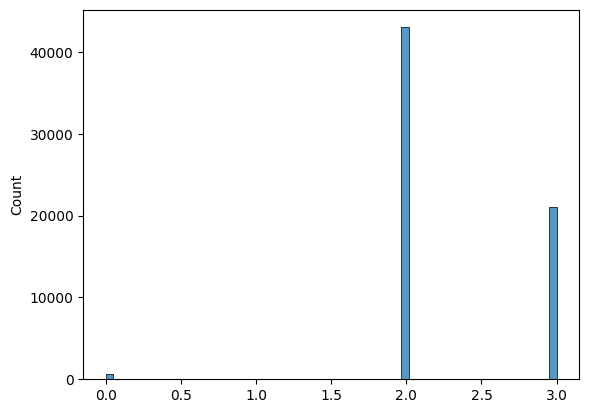

In [86]:
sns.histplot(mp_data['Meals_Usually_Taken_Per_Day'])

In [87]:
mp_data = mp_data.with_columns(
    pl.col('Meals_Usually_Taken_Per_Day').fill_null(value=3)
)

<Axes: ylabel='Count'>

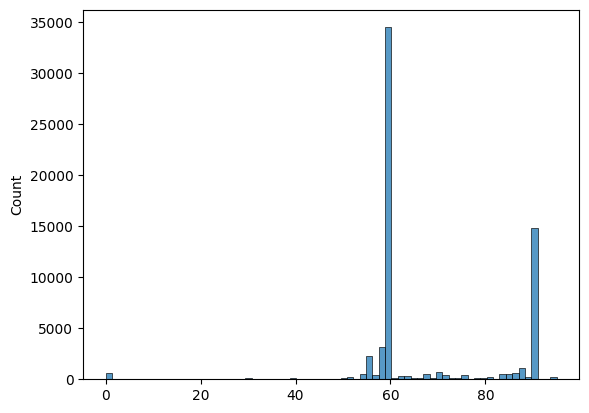

In [88]:
sns.histplot(mp_data['Meals_At_Home'])

In [89]:
mp_data = mp_data.with_columns(
    pl.col('Meals_At_Home').fill_null(strategy='mean')
)

<Axes: ylabel='Count'>

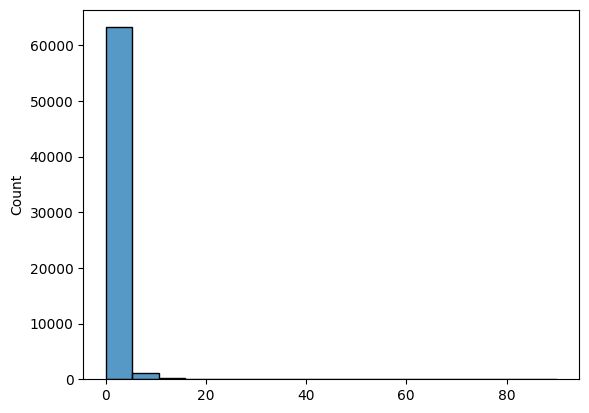

In [90]:
sns.histplot(mp_data['Meals_Other'])

<Axes: ylabel='Count'>

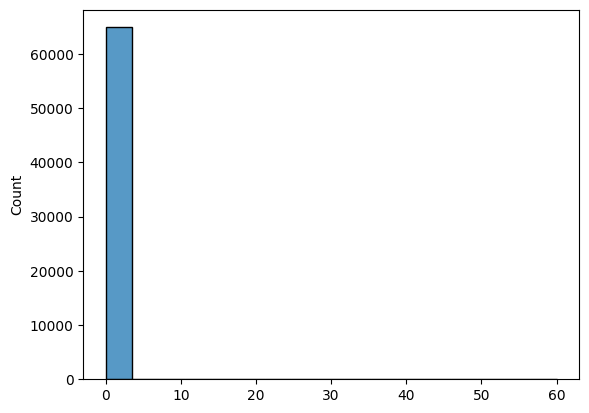

In [91]:
sns.histplot(mp_data['Meals_From_Employer'])

<Axes: ylabel='Count'>

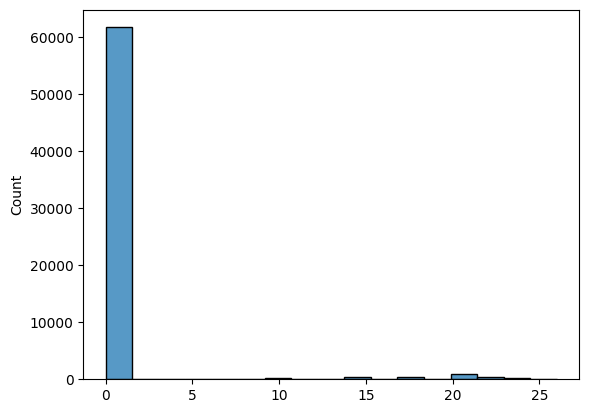

In [92]:
sns.histplot(mp_data['Meals_From_School'])

## Digital

In [93]:
mp_data[lev_02_digital]

shape: (64_952, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Used_Internet_Last_30_Days ‚îÇ
‚îÇ ---                        ‚îÇ
‚îÇ i32                        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2                          ‚îÇ
‚îÇ 1                          ‚îÇ
‚îÇ 1                          ‚îÇ
‚îÇ 2                          ‚îÇ
‚îÇ 2                          ‚îÇ
‚îÇ ‚Ä¶                          ‚îÇ
‚îÇ 1                          ‚îÇ
‚îÇ 1                          ‚îÇ
‚îÇ 1                          ‚îÇ
‚îÇ 1                          ‚îÇ
‚îÇ 1                          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [94]:
mp_data[lev_02_digital].describe()

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ Used_Internet_Last_30_Days ‚îÇ
‚îÇ ---        ‚îÜ ---                        ‚îÇ
‚îÇ str        ‚îÜ f64                        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 62395.0                    ‚îÇ
‚îÇ null_count ‚îÜ 2557.0                     ‚îÇ
‚îÇ mean       ‚îÜ 1.443529                   ‚îÇ
‚îÇ std        ‚îÜ 0.496805                   ‚îÇ
‚îÇ min        ‚îÜ 1.0                        ‚îÇ
‚îÇ 25%        ‚îÜ 1.0                        ‚îÇ
‚îÇ 50%        ‚îÜ 1.0                        ‚îÇ
‚îÇ 75%        ‚îÜ 2.0                        ‚îÇ
‚îÇ max        ‚îÜ 2.0                        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [95]:
# Percentage null value
(mp_data[lev_02_digital + lev_02__behavior].null_count() / mp_data.shape[0]) * 100 

shape: (1, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Used_Internet_Last_30_Days ‚îÜ Days_Away_From_Home_Last_30_Da‚Ä¶ ‚îÇ
‚îÇ ---                        ‚îÜ ---                             ‚îÇ
‚îÇ f64                        ‚îÜ f64                             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3.936753                   ‚îÜ 0.135485                        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

- Here 1: Yes and 2: No
- I change the labeling and make according to me 
- For digital I do the forward fill null strategy

<Axes: ylabel='Count'>

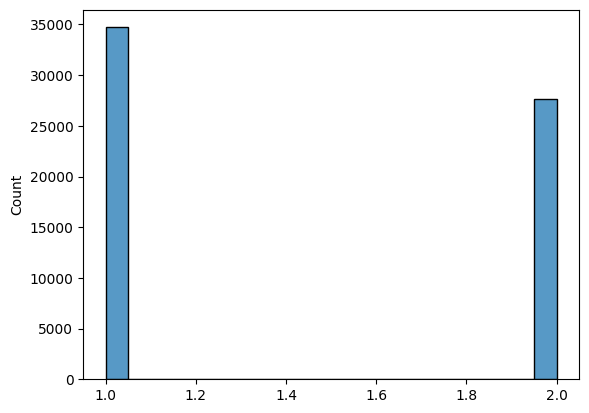

In [96]:
sns.histplot(mp_data['Used_Internet_Last_30_Days'])

In [97]:
mp_data = mp_data.with_columns(
    pl.col('Used_Internet_Last_30_Days').fill_null(strategy='forward'),
)

In [98]:
mp_data['Used_Internet_Last_30_Days'].unique()

shape: (2,)
Series: 'Used_Internet_Last_30_Days' [i32]
[
	1
	2
]

In [99]:
# 1: Yes and 2: No ---> 1:Yes and 0:No

In [100]:
mp_data = mp_data.with_columns(
    pl.when(pl.col("Used_Internet_Last_30_Days") == 1)
      .then(1)
      .when(pl.col("Used_Internet_Last_30_Days") == 2)
      .then(0)
      .otherwise(None)  # or 0 if you prefer
      .alias("Used_Internet_Last_30_Days")
)


## Behavior

In [101]:
mp_data[lev_02__behavior]

shape: (64_952, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Days_Away_From_Home_Last_30_Da‚Ä¶ ‚îÇ
‚îÇ ---                             ‚îÇ
‚îÇ i32                             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0                               ‚îÇ
‚îÇ 0                               ‚îÇ
‚îÇ 0                               ‚îÇ
‚îÇ 0                               ‚îÇ
‚îÇ 0                               ‚îÇ
‚îÇ ‚Ä¶                               ‚îÇ
‚îÇ 0                               ‚îÇ
‚îÇ 0                               ‚îÇ
‚îÇ 0                               ‚îÇ
‚îÇ 0                               ‚îÇ
‚îÇ 0                               ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [102]:
mp_data[lev_02__behavior].describe()

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ Days_Away_From_Home_Last_30_Da‚Ä¶ ‚îÇ
‚îÇ ---        ‚îÜ ---                             ‚îÇ
‚îÇ str        ‚îÜ f64                             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 64864.0                         ‚îÇ
‚îÇ null_count ‚îÜ 88.0                            ‚îÇ
‚îÇ mean       ‚îÜ 0.187022                        ‚îÇ
‚îÇ std        ‚îÜ 1.202743                        ‚îÇ
‚îÇ min        ‚îÜ 0.0                             ‚îÇ
‚îÇ 25%        ‚îÜ 0.0                             ‚îÇ
‚îÇ 50%        ‚îÜ 0.0                             ‚îÇ
‚îÇ 75%        ‚îÜ 0.0                             ‚îÇ
‚îÇ max        ‚îÜ 30.0                            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

- Due to most of value are 0 so I also do 0 

<Axes: ylabel='Count'>

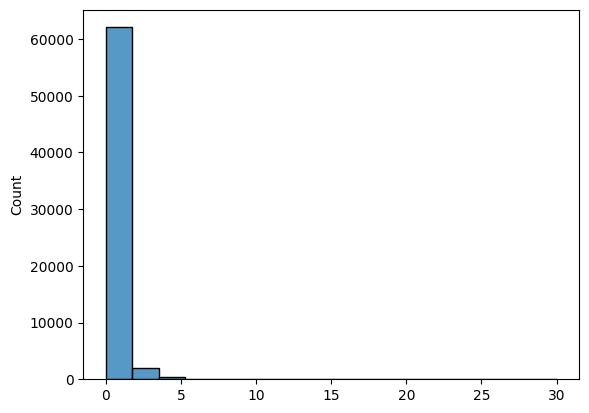

In [103]:
sns.histplot(mp_data['Days_Away_From_Home_Last_30_Days'])

In [104]:
mp_data = mp_data.with_columns(
    pl.col('Days_Away_From_Home_Last_30_Days').fill_null(strategy='one')
)

## User

In [105]:
mp_data[lev_02_user]

shape: (64_952, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ FSU_Serial_No ‚îÜ Relation_to_He ‚îÜ Gender ‚îÜ Age ‚îÜ Marital_Status ‚îÜ Education_Leve ‚îÜ Years_of_Educa ‚îÇ
‚îÇ ---           ‚îÜ ad             ‚îÜ ---    ‚îÜ --- ‚îÜ ---            ‚îÜ l              ‚îÜ tion           ‚îÇ
‚îÇ i32           ‚îÜ ---            ‚îÜ i32    ‚îÜ i32 ‚îÜ i32            ‚îÜ ---            ‚îÜ ---            ‚îÇ
‚îÇ               ‚îÜ i32            ‚îÜ        ‚îÜ     ‚îÜ                ‚îÜ i32            ‚îÜ i32            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 44081         ‚îÜ 1              ‚îÜ 2      ‚îÜ 46  ‚îÜ 3              ‚îÜ 1              ‚îÜ null           ‚îÇ
‚îÇ 44081         ‚îÜ 5              ‚îÜ 1      ‚îÜ 19  ‚îÜ 1              ‚îÜ 7              ‚îÜ 12             ‚îÇ
‚îÇ 44081         ‚îÜ 5              ‚îÜ 2      ‚îÜ 21  ‚îÜ 1              ‚îÜ 7              ‚îÜ 12             ‚îÇ
‚îÇ 44081         ‚îÜ 1              ‚îÜ 1      ‚îÜ 52  ‚îÜ 2              ‚îÜ 3              ‚îÜ 5              ‚îÇ
‚îÇ 44081         ‚îÜ 2              ‚îÜ 2      ‚îÜ 50  ‚îÜ 2              ‚îÜ 1              ‚îÜ null           ‚îÇ
‚îÇ ‚Ä¶             ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶              ‚îÇ
‚îÇ 25137         ‚îÜ 1              ‚îÜ 1      ‚îÜ 42  ‚îÜ 2              ‚îÜ 5              ‚îÜ 8              ‚îÇ
‚îÇ 25137         ‚îÜ 2              ‚îÜ 2      ‚îÜ 40  ‚îÜ 2              ‚îÜ 5              ‚îÜ 8              ‚îÇ
‚îÇ 25137         ‚îÜ 5              ‚îÜ 1      ‚îÜ 11  ‚îÜ 1              ‚îÜ 4              ‚îÜ 5              ‚îÇ
‚îÇ 25137         ‚îÜ 5              ‚îÜ 2      ‚îÜ 14  ‚îÜ 1              ‚îÜ 5              ‚îÜ 8              ‚îÇ
‚îÇ 25137         ‚îÜ 5              ‚îÜ 2      ‚îÜ 9   ‚îÜ 1              ‚îÜ 3              ‚îÜ 3              ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [106]:
mp_data[lev_02_user].describe()

shape: (9, 8)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ FSU_Serial ‚îÜ Relation_t ‚îÜ Gender   ‚îÜ Age       ‚îÜ Marital_St ‚îÜ Education ‚îÜ Years_of_ ‚îÇ
‚îÇ ---        ‚îÜ _No        ‚îÜ o_Head     ‚îÜ ---      ‚îÜ ---       ‚îÜ atus       ‚îÜ _Level    ‚îÜ Education ‚îÇ
‚îÇ str        ‚îÜ ---        ‚îÜ ---        ‚îÜ f64      ‚îÜ f64       ‚îÜ ---        ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ f64        ‚îÜ f64        ‚îÜ          ‚îÜ           ‚îÜ f64        ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 64952.0    ‚îÜ 64952.0    ‚îÜ 64952.0  ‚îÜ 64952.0   ‚îÜ 64952.0    ‚îÜ 64952.0   ‚îÜ 47934.0   ‚îÇ
‚îÇ null_count ‚îÜ 0.0        ‚îÜ 0.0        ‚îÜ 0.0      ‚îÜ 0.0       ‚îÜ 0.0        ‚îÜ 0.0       ‚îÜ 17018.0   ‚îÇ
‚îÇ mean       ‚îÜ 36407.8620 ‚îÜ 3.630142   ‚îÜ 1.482387 ‚îÜ 30.484974 ‚îÜ 1.627694   ‚îÜ 4.703458  ‚îÜ 8.965056  ‚îÇ
‚îÇ            ‚îÜ 83         ‚îÜ            ‚îÜ          ‚îÜ           ‚îÜ            ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ std        ‚îÜ 8555.76459 ‚îÜ 2.006095   ‚îÜ 0.499909 ‚îÜ 19.286044 ‚îÜ 0.597384   ‚îÜ 3.339115  ‚îÜ 4.325704  ‚îÇ
‚îÇ min        ‚îÜ 25000.0    ‚îÜ 1.0        ‚îÜ 1.0      ‚îÜ 0.0       ‚îÜ 1.0        ‚îÜ 1.0       ‚îÜ 0.0       ‚îÇ
‚îÇ 25%        ‚îÜ 25296.0    ‚îÜ 2.0        ‚îÜ 1.0      ‚îÜ 15.0      ‚îÜ 1.0        ‚îÜ 2.0       ‚îÜ 5.0       ‚îÇ
‚îÇ 50%        ‚îÜ 42399.0    ‚îÜ 4.0        ‚îÜ 1.0      ‚îÜ 28.0      ‚îÜ 2.0        ‚îÜ 4.0       ‚îÜ 8.0       ‚îÇ
‚îÇ 75%        ‚îÜ 42742.0    ‚îÜ 5.0        ‚îÜ 2.0      ‚îÜ 45.0      ‚îÜ 2.0        ‚îÜ 6.0       ‚îÜ 12.0      ‚îÇ
‚îÇ max        ‚îÜ 44199.0    ‚îÜ 9.0        ‚îÜ 3.0      ‚îÜ 105.0     ‚îÜ 4.0        ‚îÜ 13.0      ‚îÜ 20.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [107]:
# Percentage null value
(mp_data[lev_02_user].null_count() / mp_data.shape[0]) * 100 

shape: (1, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ FSU_Serial_No ‚îÜ Relation_to_He ‚îÜ Gender ‚îÜ Age ‚îÜ Marital_Status ‚îÜ Education_Leve ‚îÜ Years_of_Educa ‚îÇ
‚îÇ ---           ‚îÜ ad             ‚îÜ ---    ‚îÜ --- ‚îÜ ---            ‚îÜ l              ‚îÜ tion           ‚îÇ
‚îÇ f64           ‚îÜ ---            ‚îÜ f64    ‚îÜ f64 ‚îÜ f64            ‚îÜ ---            ‚îÜ ---            ‚îÇ
‚îÇ               ‚îÜ f64            ‚îÜ        ‚îÜ     ‚îÜ                ‚îÜ f64            ‚îÜ f64            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.0           ‚îÜ 0.0            ‚îÜ 0.0    ‚îÜ 0.0 ‚îÜ 0.0            ‚îÜ 0.0            ‚îÜ 26.200887      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [108]:
mp_data['Years_of_Education'].unique().to_list()

[None,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20]

In [109]:
mp_data['Years_of_Education'].n_unique()

22

In [110]:
mp_data['Years_of_Education'].skew()

0.19957148750414322

- If you notice data is 26 empty so 
- We can't directly replace with 0 so 
- we check skewness it is not even 1 
- so now we safe
- Slight Skew ok to fill with the mean

In [111]:
mp_data['Years_of_Education'].value_counts()

shape: (22, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Years_of_Education ‚îÜ count ‚îÇ
‚îÇ ---                ‚îÜ ---   ‚îÇ
‚îÇ i32                ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 4                  ‚îÜ 2025  ‚îÇ
‚îÇ 2                  ‚îÜ 1800  ‚îÇ
‚îÇ 14                 ‚îÜ 944   ‚îÇ
‚îÇ 20                 ‚îÜ 74    ‚îÇ
‚îÇ 19                 ‚îÜ 260   ‚îÇ
‚îÇ ‚Ä¶                  ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 6                  ‚îÜ 1797  ‚îÇ
‚îÇ 1                  ‚îÜ 1201  ‚îÇ
‚îÇ 16                 ‚îÜ 598   ‚îÇ
‚îÇ 15                 ‚îÜ 4327  ‚îÇ
‚îÇ 13                 ‚îÜ 622   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: ylabel='Count'>

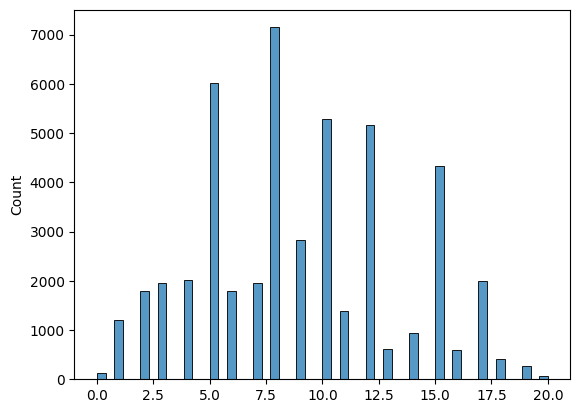

In [112]:
sns.histplot(mp_data['Years_of_Education'])

In [113]:
#sns.countplot(mp_data['Years_of_Education'])

In [114]:
mp_data = mp_data.with_columns(
    pl.col('Years_of_Education').fill_null(strategy='mean')
)

In [115]:
mp_data.null_count()

shape: (1, 18)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Revisit_St ‚îÜ FDQ_Origin ‚îÜ Multiplier ‚îÜ Meals_Usua ‚îÜ ‚Ä¶ ‚îÜ Age ‚îÜ Marital_St ‚îÜ Education ‚îÜ Years_of_ ‚îÇ
‚îÇ atus       ‚îÜ al_Member  ‚îÜ ---        ‚îÜ lly_Taken_ ‚îÜ   ‚îÜ --- ‚îÜ atus       ‚îÜ _Level    ‚îÜ Education ‚îÇ
‚îÇ ---        ‚îÜ ---        ‚îÜ u32        ‚îÜ Per_Day    ‚îÜ   ‚îÜ u32 ‚îÜ ---        ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ u32        ‚îÜ u32        ‚îÜ            ‚îÜ ---        ‚îÜ   ‚îÜ     ‚îÜ u32        ‚îÜ u32       ‚îÜ u32       ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ u32        ‚îÜ   ‚îÜ     ‚îÜ            ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0          ‚îÜ 0          ‚îÜ 0          ‚îÜ 0          ‚îÜ ‚Ä¶ ‚îÜ 0   ‚îÜ 0          ‚îÜ 0         ‚îÜ 0         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [116]:
mp_data['Age'].unique()

shape: (101,)
Series: 'Age' [i32]
[
	0
	1
	2
	3
	4
	‚Ä¶
	98
	101
	102
	104
	105
]

In [117]:
mp_data.filter(
    pl.col('Age') == 0
).shape

# 681 values are 0 how üòÜ

(681, 18)

- How it is possible to age should be zero
- Check the skewness data is missing may be so it fill with 
- Very funny way üòÜ
- So I fill with the mean 

In [118]:
mp_data['Age'].skew()

0.4509959368658372

In [119]:
mp_data['Age'].describe()

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ value     ‚îÇ
‚îÇ ---        ‚îÜ ---       ‚îÇ
‚îÇ str        ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 64952.0   ‚îÇ
‚îÇ null_count ‚îÜ 0.0       ‚îÇ
‚îÇ mean       ‚îÜ 30.484974 ‚îÇ
‚îÇ std        ‚îÜ 19.286044 ‚îÇ
‚îÇ min        ‚îÜ 0.0       ‚îÇ
‚îÇ 25%        ‚îÜ 15.0      ‚îÇ
‚îÇ 50%        ‚îÜ 28.0      ‚îÇ
‚îÇ 75%        ‚îÜ 45.0      ‚îÇ
‚îÇ max        ‚îÜ 105.0     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: ylabel='Count'>

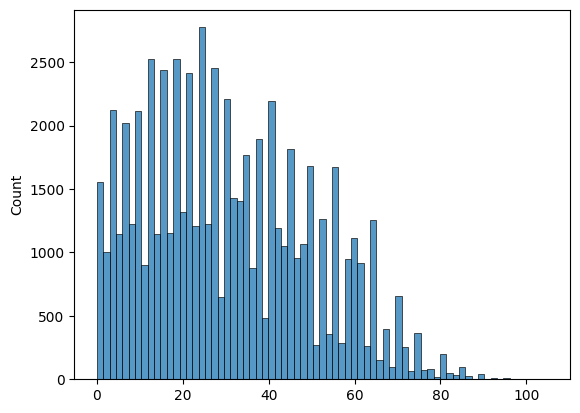

In [120]:
sns.histplot(mp_data['Age'])

In [121]:
mp_data['Age'].mean()

30.48497351890627

In [122]:
mp_data.filter(
    pl.col('Age') == 0
).select(pl.col('Age'))

shape: (681, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Age ‚îÇ
‚îÇ --- ‚îÇ
‚îÇ i32 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0   ‚îÇ
‚îÇ 0   ‚îÇ
‚îÇ 0   ‚îÇ
‚îÇ 0   ‚îÇ
‚îÇ 0   ‚îÇ
‚îÇ ‚Ä¶   ‚îÇ
‚îÇ 0   ‚îÇ
‚îÇ 0   ‚îÇ
‚îÇ 0   ‚îÇ
‚îÇ 0   ‚îÇ
‚îÇ 0   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [123]:
mp_data = mp_data.with_columns(
    pl.when(pl.col("Age") == 0)
      .then(None)
      .otherwise(pl.col("Age"))
      .alias("Age")
)

mp_data = mp_data.with_columns(
    pl.col("Age").fill_null(strategy="forward").alias("Age")
)

In [124]:
(mp_data.filter(pl.col("Age") == 0)).height
# should return 0 if all 0s were replaced

0

In [125]:
mp_data['Marital_Status'].unique()

shape: (4,)
Series: 'Marital_Status' [i32]
[
	1
	2
	3
	4
]

In [126]:
mp_data['Years_of_Education'].unique()

shape: (21,)
Series: 'Years_of_Education' [i32]
[
	0
	1
	2
	3
	4
	‚Ä¶
	16
	17
	18
	19
	20
]

In [127]:
mp_data['Education_Level'].unique()

shape: (12,)
Series: 'Education_Level' [i32]
[
	1
	2
	3
	4
	5
	‚Ä¶
	8
	10
	11
	12
	13
]

In [128]:
"""
1	never married	483369	
2	currently married(including living together)	557180	
3	widowed	62062	
4	divorced/separated
"""

'\n1\tnever married\t483369\t\n2\tcurrently married(including living together)\t557180\t\n3\twidowed\t62062\t\n4\tdivorced/separated\n'

In [129]:
#mp_data = mp_data.drop('literal')

mp_data.columns

['Revisit_Status',
 'FDQ_Original_Member',
 'Multiplier',
 'Meals_Usually_Taken_Per_Day',
 'Meals_From_School',
 'Meals_From_Employer',
 'Meals_Other',
 'Meals_On_Payment',
 'Meals_At_Home',
 'Used_Internet_Last_30_Days',
 'Days_Away_From_Home_Last_30_Days',
 'FSU_Serial_No',
 'Relation_to_Head',
 'Gender',
 'Age',
 'Marital_Status',
 'Education_Level',
 'Years_of_Education']

In [130]:
# All zero no null values üôå

# Some Feature Engineering ideas
# - is_meal_done (Check user done meal or not, 1:Yes, 0:No)
# - is_educated (1:Yes, 0:No)
# - is_labour (Days_Away_From_Home_Last_30_Days if this is max then 25) & 
#   (if Meals_Usually_Taken_Per_Day is less than and equal to 0)
# make cluster for the this year of eductions Years_of_Education and education level 

In [131]:
mp_data['Years_of_Education'].unique().to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [132]:
# is_nuclear_family (my assumption father, mother, 3 child) because we focus on the rural village
# so anything which is > than 5 include as joint_family

In [133]:
# Done üôå
# Now Again eda on this clean data then 
# Feature engineering 
# Then again Clean data

In [134]:
mp_data.write_csv(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-02\data2\lev_02_mp_clean.csv")
mp_data.write_parquet(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-02\data2\lev_02_mp_clean.parquet", compression="zstd")